In [535]:
import pandas as pd
import numpy as np

In [536]:
filepath = "../Data/Combined/FHD_55.csv"
data = pd.read_csv(filepath, index_col=False)

In [537]:
data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

In [538]:
#data['controller_right_vel_norm'] = (data['controller_right_vel'] - min(data['controller_right_vel'])) / (max(data['controller_right_vel']) - min(data['controller_right_vel']))

In [539]:
print(data['controller_right_vel.z'].to_string())

0      0.057862
1      0.060892
2      0.050286
3      0.037317
4      0.026624
5      0.017466
6      0.016168
7      0.014243
8      0.022534
9      0.011658
10    -0.006838
11    -0.038672
12    -0.077063
13    -0.104749
14    -0.138454
15    -0.174186
16    -0.207313
17    -0.250812
18    -0.289391
19    -0.329263
20    -0.390454
21    -0.468049
22    -0.555397
23    -0.640717
24    -0.717368
25    -0.788435
26    -0.859650
27    -0.933869
28    -1.024321
29    -1.105948
30    -1.190974
31    -1.266415
32    -1.355670
33    -1.443477
34    -1.531568
35    -1.621026
36    -1.706849
37    -1.786902
38    -1.857642
39    -1.919297
40    -1.973671
41    -2.016948
42    -2.050601
43    -2.082609
44    -2.119310
45    -2.138475
46    -2.129413
47    -2.096953
48    -2.055361
49    -2.014639
50    -1.976793
51    -1.934926
52    -1.896364
53    -1.849199
54    -1.786377
55    -1.710586
56    -1.619334
57    -1.511715
58    -1.390811
59    -1.252181
60    -1.086328
61    -0.927338
62    -0

In [540]:
start = 0
end = len(data['controller_right_vel.z'])

data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

pos = -1
neg = -1
mn = float('inf')
mx = -float('inf')
apex = -1
max_apex = -float('inf')

for i in range(len(data['controller_right_vel'])):
    if float(data['controller_right_vel'][i]) > max_apex:
        apex = i
        max_apex = data['controller_right_vel'][i]
print(apex)

for i in range(apex):
    if float(data['controller_right_vel.z'][i]) > mx:
        mx = float(data['controller_right_vel.z'][i])
        pos = i
for i in range(apex, len(data['controller_right_vel.z'])):
    if float(data['controller_right_vel.z'][i]) < mn:
        mn = float(data['controller_right_vel.z'][i])
        neg = i


if mn > 0:
    neg = pos

#for i in range(len(data['controller_right_vel.z'])-1):
#    if abs(data['controller_right_vel.z'][i]) < 0.2 and abs(data['controller_right_vel.z'][i+1]) >= 0.2:
#        start = i+1
#        break

for i in range(pos, 0, -1):
    if data['controller_right_vel.z'][i] >= 0.2 and data['controller_right_vel.z'][i-1] < 0.2:
        start = i
        break

for i in range(neg, len(data['controller_right_vel.z'])-1):
    if -1*data['controller_right_vel.z'][i] >= 0.2 and -1*data['controller_right_vel.z'][i+1] < 0.2:
        end = i+1
        break


103


In [541]:
#print(data['controller_right_vel.z'].to_string())

In [542]:
def start_end_FHD_BHD(data):
    """
    Preliminary Function to determine start and end indices for a given FHD
    or BHD sensor trace.

    Returns tuple, of indices at which start and end of swing are estimated
    to be.

    PROVEN TO BE INACCURATE AT TIMES!
    """
    start = 0
    end = len(data['controller_right_vel.z'])

    data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

    pos = -1
    neg = -1
    min = float('inf')
    max = -float('inf')
    for i in range(len(data['controller_right_vel.z'])):
        if float(data['controller_right_vel.z'][i]) > max:
            max = float(data['controller_right_vel.z'][i])
            pos = i
        if float(data['controller_right_vel.z'][i]) < min:
            min = float(data['controller_right_vel.z'][i])
            neg = i

    if min > 0:
        neg = pos

    for i in range(pos, 0, -1):
        if abs(data['controller_right_vel.z'][i]) >= 0.2 and abs(data['controller_right_vel.z'][i-1]) < 0.2:
            start = i
            break

    for i in range(neg, len(data['controller_right_vel.z'])-1):
        if abs(data['controller_right_vel.z'][i]) >= 0.2 and abs(data['controller_right_vel.z'][i+1]) < 0.2:
            end = i+1
            break
    
    return (start, end)

In [543]:
def start_end_FHD_BHD_2(data):
    """
    Another preliminary Function to determine start and end indices for a given FHD
    or BHD sensor trace.

    Returns tuple, of indices at which start and end of swing are estimated
    to be.

    ALSO NOT GREAT...
    """
    start = 0
    end = len(data['controller_right_vel.z'])

    data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

    apex = -1
    max = -float('inf')
    for i in range(len(data['controller_right_vel'])):
        if float(data['controller_right_vel'][i]) > max:
            max = float(data['controller_right_vel'][i])
            apex = i
    #print(apex)

    for i in range(apex, 0, -1):
        if abs(data['controller_right_vel'][i]) >= 0.2 and abs(data['controller_right_vel'][i-1]) < 0.2:
            start = i
            break

    for i in range(apex, len(data['controller_right_vel'])-1):
        if abs(data['controller_right_vel'][i]) >= 0.2 and abs(data['controller_right_vel'][i+1]) < 0.2:
            end = i+1
            break
    
    return (start, end)

In [544]:
def start_end_FHD_BHD_3(data):
    """
    Another preliminary Function to determine start and end indices for a given FHD
    or BHD sensor trace.

    Returns tuple, of indices at which start and end of swing are estimated
    to be.
    """
    start = 0
    end = len(data['controller_right_vel.z'])

    data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

    pos = -1
    neg = -1
    min = float('inf')
    max = -float('inf')
    apex = -1
    max_apex = -float('inf')

    for i in range(len(data['controller_right_vel'])):
        if float(data['controller_right_vel'][i]) > max_apex:
            apex = i
            max_apex = data['controller_right_vel'][i]

    for i in range(apex):
        if float(data['controller_right_vel.z'][i]) > max:
            max = float(data['controller_right_vel.z'][i])
            pos = i
    for i in range(apex, len(data['controller_right_vel.z'])):
        if float(data['controller_right_vel.z'][i]) < min:
            min = float(data['controller_right_vel.z'][i])
            neg = i


    if min > 0:
        neg = pos

    for i in range(pos, 0, -1):
        if data['controller_right_vel.z'][i] >= 0.2 and data['controller_right_vel.z'][i-1] < 0.2:
            start = i
            break

    for i in range(neg, len(data['controller_right_vel.z'])-1):
        if -1*data['controller_right_vel.z'][i] >= 0.2 and -1*data['controller_right_vel.z'][i+1] < 0.2:
            end = i+1
            break
    
    return (start, end)


In [545]:
filepath = "../Data/Combined/VOL_46.csv"
data = pd.read_csv(filepath, index_col=False)

In [546]:
start_end_FHD_BHD(data) 
# This finds the most postiive and negative controller_right_vel.z values. 
# Then, moves forward and backwards until abs(controller_right_vel.z) reaches close to 0.
# Chooses (start, end) when close to 0.

# Might not work, if there is no positive/negative velocity in z direction (bad swing, or volley: Only positive z)

(61, 59)

In [547]:
start_end_FHD_BHD_2(data) # This just measures controller velocity. 

# Most accurate for volleys. 

# Practically gives us a bound for others, since sometimes, the swing ends, but velocity is not small enough.

(0, 94)

In [548]:
start_end_FHD_BHD_3(data) # A lot better accuracy overall, except in case of bad swing, or volley.

# Same method as the start_end_FHD_BHD, but finds "apex", or highest velocity, of swing. 
# Then, finds max positive before apex, and min negative after apex.
# Then, moves forward (negative) and backwards (positive) until abs(controller_right_vel.z) reaches close to 0.

# Very accurate at finding "start" time for volley, but not end


(61, 226)

Methods 1 and 3 are inaccurate for volleys, because they expect the right controller to move FORWARDS and then BACKWARDS,
and uses this expectation to calcualte start/end estimates.

Volleys do not have an inherent "back" motion and need a separate start/end estimator. (Possibly Method 2)

In [549]:
filepath = "../Data/Combined/VOL_34.csv"
data = pd.read_csv(filepath, index_col=False)

This might be our best estimate: 

In most cases, the second function just gives us a strict bounds on start/end coordinates.
In most cases, the third function gives us the most accurate estimate.

In cases of volley, the third function cannot find an appropriate end. Thus, it uses the bound given by function 2.

In [550]:
start1, end1 = start_end_FHD_BHD_2(data)
start2, end2 = start_end_FHD_BHD_3(data)
print((max(start1, start2), min(end1, end2)))

(59, 98)


In [551]:
#data = pd.read_csv("../Data/Combined/SRV_55.csv", index_col=False)
#data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

In [552]:
print(data['controller_right_vel.z'].to_string())


0     -0.035140
1     -0.054451
2     -0.075416
3     -0.097420
4     -0.118540
5     -0.145670
6     -0.171747
7     -0.189646
8     -0.207563
9     -0.215342
10    -0.221265
11    -0.229410
12    -0.239674
13    -0.246642
14    -0.246012
15    -0.240996
16    -0.234861
17    -0.229741
18    -0.223048
19    -0.210916
20    -0.193587
21    -0.176169
22    -0.157611
23    -0.137184
24    -0.118313
25    -0.096002
26    -0.063484
27    -0.018678
28     0.029702
29     0.078764
30     0.118246
31     0.154215
32     0.196998
33     0.222103
34     0.245533
35     0.261589
36     0.264478
37     0.248495
38     0.217084
39     0.168955
40     0.101240
41     0.013608
42    -0.089865
43    -0.203002
44    -0.327428
45    -0.434563
46    -0.517528
47    -0.595593
48    -0.653782
49    -0.691413
50    -0.702926
51    -0.679139
52    -0.623652
53    -0.540731
54    -0.445286
55    -0.328998
56    -0.191389
57    -0.038013
58     0.099068
59     0.258475
60     0.462477
61     0.678929
62     0

In [553]:
filepath = "../Data/Combined/SRV_77.csv"
data = pd.read_csv(filepath, index_col=False)

In [554]:
start = 0
end = len(data['controller_right_vel.z'])

data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

apex = -1
mx = -float('inf')
for i in range(len(data['controller_right_vel'])):
    if float(data['controller_right_vel'][i]) > mx:
        mx = float(data['controller_right_vel'][i])
        apex = i
#print(apex)

for i in range(apex, 0, -1):
    if abs(data['controller_right_vel'][i]) >= 1 and abs(data['controller_right_vel'][i-1]) < 1:
        start = i
        break

for i in range(apex, len(data['controller_right_vel'])-1):
    if abs(data['controller_right_vel'][i]) >= 1 and abs(data['controller_right_vel'][i+1]) < 1:
        end = i+1
        break

print(start, end)

80 128


In [567]:
def start_end_FHD_BHD_4(data):
    """
    Another preliminary Function to determine start and end indices for a given FHD
    or BHD sensor trace.

    Returns tuple, of indices at which start and end of swing are estimated
    to be.
    """
    start = 0
    end = len(data['controller_right_vel.z'])

    data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

    pos = -1
    neg = -1
    min = float('inf')
    max = -float('inf')
    apex = -1
    max_apex = -float('inf')

    for i in range(len(data['controller_right_vel'])): # Finding moment of highest Velocity
        if float(data['controller_right_vel'][i]) > max_apex:
            apex = i
            max_apex = data['controller_right_vel'][i]

    for i in range(apex):
        if float(data['controller_right_vel.z'][i]) > max: # Finding moment of highest velocity forwards, up to apex
            max = float(data['controller_right_vel.z'][i])
            pos = i
    for i in range(apex, len(data['controller_right_vel.z'])): # Finding moment of highest velocity backwards, after apex
        if float(data['controller_right_vel.z'][i]) < min:
            min = float(data['controller_right_vel.z'][i])
            neg = i

    if min > -1: # If no significant velocity backwards, start both searches at highest velocity forwards
        neg = pos # This assumes your swing moves forwards. If it doesn't then you might be hopeless

    for i in range(pos, 0, -1): # Search backwards from moment of highest velocity forwards. Finds moment when z-velocity becomes significant.
        if data['controller_right_vel.z'][i] >= 0.2 and data['controller_right_vel.z'][i-1] < 0.2:
            start = i
            break

    for i in range(neg, len(data['controller_right_vel.z'])-1): # Search forwards from moment of highest velocity backwards (or forwards, if backward movement is not found). Finds moment when z-velocity becomes insignificant.
        if abs(data['controller_right_vel.z'][i]) >= 0.2 and abs(data['controller_right_vel.z'][i+1]) < 0.2:
            end = i+1
            break
    
    return (start, end)

In [556]:
filepath = "../Data/Combined/VOL_26.csv"
data = pd.read_csv(filepath, index_col=False)

In [557]:
start_end_FHD_BHD_4(data)

(73, 125)

In [558]:
start_end_FHD_BHD_3(data)

(73, 125)

In [559]:
start_end_FHD_BHD_2(data)

(0, 146)

In [560]:
print(data['controller_right_vel.z'].to_string())

0     -0.360690
1     -0.346078
2     -0.347481
3     -0.344297
4     -0.334647
5     -0.325962
6     -0.322088
7     -0.320123
8     -0.327637
9     -0.324799
10    -0.338640
11    -0.353436
12    -0.365477
13    -0.357635
14    -0.338221
15    -0.320043
16    -0.308514
17    -0.306072
18    -0.311095
19    -0.320937
20    -0.326898
21    -0.326686
22    -0.327808
23    -0.335487
24    -0.341875
25    -0.349628
26    -0.357204
27    -0.358482
28    -0.364264
29    -0.380082
30    -0.393487
31    -0.405394
32    -0.414707
33    -0.435118
34    -0.447958
35    -0.457049
36    -0.468496
37    -0.480154
38    -0.485561
39    -0.484035
40    -0.482500
41    -0.483017
42    -0.489799
43    -0.498628
44    -0.514413
45    -0.528034
46    -0.526839
47    -0.511322
48    -0.505993
49    -0.524300
50    -0.557034
51    -0.590584
52    -0.622656
53    -0.651595
54    -0.682286
55    -0.714968
56    -0.761582
57    -0.798471
58    -0.796639
59    -0.797151
60    -0.797787
61    -0.784496
62    -0

In [561]:
def get_start(data):
    """
    Another preliminary Function to determine start index for a given FHD
    or BHD sensor trace.

    Returns integer, of index at which start of swing is estimated to be.
    """
    start = 0

    data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

    pos = -1
    max = -float('inf')
    apex = -1
    max_apex = -float('inf')

    for i in range(len(data['controller_right_vel'])): # Finding moment of highest Velocity
        if float(data['controller_right_vel'][i]) > max_apex:
            apex = i
            max_apex = data['controller_right_vel'][i]

    for i in range(apex):
        if float(data['controller_right_vel.z'][i]) > max: # Finding moment of highest velocity forwards, up to apex
            max = float(data['controller_right_vel.z'][i])
            pos = i

    for i in range(pos, 0, -1): # Search backwards from moment of highest velocity forwards. Finds moment when z-velocity becomes significant.
        if data['controller_right_vel.z'][i] >= 0.2 and data['controller_right_vel.z'][i-1] < 0.2:
            start = i
            break
    
    return start

In [562]:
get_start(data)

73

In [563]:
import matplotlib.pyplot as plt

In [564]:
filepath = "../Data/Combined/VOL_26.csv"
data = pd.read_csv(filepath, index_col=False)
data['controller_right_vel'] = (data['controller_right_vel.x'] ** 2 + data['controller_right_vel.y'] ** 2 + data['controller_right_vel.z'] ** 2) ** (1/2)

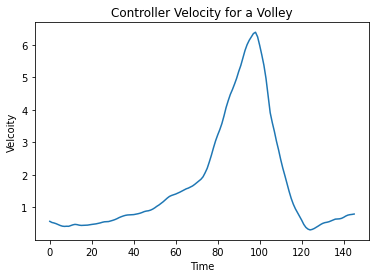

In [565]:
plt.plot(data['controller_right_vel'])
plt.title("Controller Velocity for a Volley")
plt.ylabel("Velcoity")
plt.xlabel("Time")
plt.show()

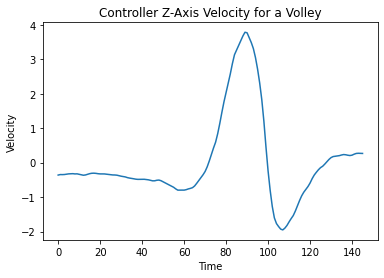

In [566]:
plt.plot(data['controller_right_vel.z'])
plt.title("Controller Z-Axis Velocity for a Volley")
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.show()

In [568]:
filepath = "../Data/Combined/VOL_26.csv"
data = pd.read_csv(filepath, index_col=False)
start_end_FHD_BHD_4(data)

(73, 125)